IMPORTING NECESSARY LIBRARIES    -    ALSO, WE IMPORT LIBRARIES BELOW 

AIN212 PROJECT
-SARE NAZ ERSOY
-BAHA KIRBAŞOĞLU

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
url ='https://drive.google.com/file/d/1rSpP0fMU3ivMSPpsSDpky6aw1tBdYF41/view?usp=sharing'
url ='https://drive.google.com/uc?id='+url.split('/')[-2]

READING and CLEANING DATA 

In [3]:
df = pd.read_csv(url)
df

,Id,LocID,Location,Time,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_5_9,PopFemale_5_9,PopTotal_5_9,...,PopMale_95_99,PopFemale_95_99,PopTotal_95_99,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus,PopMale,PopFemale,PopTotal,YearDataCompleted
0,1,4,Afghanistan,1950,630.044,661.578,1291.622,516.206,487.335,1003.541,...,0.004,0.003,0.007,0.000,0.000,0.000,4099.243,3652.874,7752.117,1
1,2,4,Afghanistan,1951,641.199,673.293,1314.492,525.302,502.402,1027.704,...,0.007,0.005,0.012,0.000,0.000,0.000,4134.756,3705.395,7840.151,1
2,3,4,Afghanistan,1952,650.825,669.274,1320.099,533.097,521.672,1054.769,...,0.012,0.009,0.021,0.000,0.000,0.000,4174.450,3761.546,7935.996,1
3,4,4,Afghanistan,1953,659.896,663.606,1323.502,538.351,541.216,1079.567,...,0.015,0.013,0.028,0.000,0.000,0.000,4218.336,3821.348,8039.684,1
4,5,4,Afghanistan,1954,670.694,663.295,1333.989,540.820,557.196,1098.016,...,0.014,0.011,0.025,0.000,0.000,0.000,4266.484,3884.832,8151.316,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66888,66889,716,Zimbabwe,2096,953.505,939.918,1893.423,968.045,956.123,1924.168,...,3.108,11.248,14.356,0.142,0.883,1.025,15008.463,15932.316,30940.779,1
66889,66890,716,Zimbabwe,2097,950.059,936.463,1886.522,963.764,951.798,1915.562,...,4.189,13.881,18.070,0.154,0.947,1.101,15008.822,15943.386,30952.208,1
66890,66891,716,Zimbabwe,2098,946.047,932.455,1878.502,959.864,947.789,1907.653,...,5.003,15.945,20.948,0.169,1.022,1.191,15007.570,15952.241,30959.811,1
66891,66892,716,Zimbabwe,2099,941.631,928.001,1869.632,956.124,943.898,1900.022,...,4.960,16.180,21.140,0.185,1.107,1.292,15004.963,15959.089,30964.052,1


In [4]:
# Here we dropped Id, YearDataCompleted as a processing "cleaning unnecessary columns".
df = df.drop(columns =['Id',"YearDataCompleted"], axis = 1)

# above, we see that there was only outlier in LocID column, after that we drop that column.
# below, we concat the columns for reducing column numbers.
df = df.drop(columns = ["LocID"], axis =1)
df["PopFemale_0_19"]=df["PopFemale_0_4"]+df["PopFemale_5_9"]+df["PopFemale_10_14"]+df["PopFemale_15_19"]
df.drop(columns=["PopFemale_0_4","PopFemale_5_9","PopFemale_10_14","PopFemale_15_19"], axis=1, inplace=True)
df["PopMale_0_19"]=df["PopMale_0_4"]+df["PopMale_5_9"]+df["PopMale_10_14"]+df["PopMale_15_19"]
df.drop(columns=["PopMale_0_4","PopMale_5_9","PopMale_10_14","PopMale_15_19"], axis=1, inplace=True)
df["PopTotal_0_19"]=df["PopTotal_0_4"]+df["PopTotal_5_9"]+df["PopTotal_10_14"]+df["PopTotal_15_19"]
df.drop(columns=["PopTotal_0_4","PopTotal_5_9","PopTotal_10_14","PopTotal_15_19"], axis=1, inplace=True)

df["PopFemale_20_39"]=df["PopFemale_20_24"]+df["PopFemale_25_29"]+df["PopFemale_30_34"]+df["PopFemale_35_39"]
df.drop(columns=["PopFemale_20_24","PopFemale_25_29","PopFemale_30_34","PopFemale_35_39"], axis=1, inplace=True)
df["PopMale_20_39"]=df["PopMale_20_24"]+df["PopMale_25_29"]+df["PopMale_30_34"]+df["PopMale_35_39"]
df.drop(columns=["PopMale_20_24","PopMale_25_29","PopMale_30_34","PopMale_35_39"], axis=1, inplace=True)
df["PopTotal_20_39"]=df["PopTotal_20_24"]+df["PopTotal_25_29"]+df["PopTotal_30_34"]+df["PopTotal_35_39"]
df.drop(columns=["PopTotal_20_24","PopTotal_25_29","PopTotal_30_34","PopTotal_35_39"], axis=1, inplace=True)

df["PopFemale_40_59"]=df["PopFemale_40_44"]+df["PopFemale_45_49"]+df["PopFemale_50_54"]+df["PopFemale_55_59"]
df.drop(columns=["PopFemale_40_44","PopFemale_45_49","PopFemale_50_54","PopFemale_55_59"], axis=1, inplace=True)
df["PopMale_40_59"]=df["PopMale_40_44"]+df["PopMale_45_49"]+df["PopMale_50_54"]+df["PopMale_55_59"]
df.drop(columns=["PopMale_40_44","PopMale_45_49","PopMale_50_54","PopMale_55_59"], axis=1, inplace=True)
df["PopTotal_40_59"]=df["PopTotal_40_44"]+df["PopTotal_45_49"]+df["PopTotal_50_54"]+df["PopTotal_55_59"]
df.drop(columns=["PopTotal_40_44","PopTotal_45_49","PopTotal_50_54","PopTotal_55_59"], axis=1, inplace=True)

df["PopFemale_60_79"]=df["PopFemale_60_64"]+df["PopFemale_65_69"]+df["PopFemale_70_74"]+df["PopFemale_75_79"]
df.drop(columns=["PopFemale_60_64","PopFemale_65_69","PopFemale_70_74","PopFemale_75_79"], axis=1, inplace=True)
df["PopMale_60_79"]=df["PopMale_60_64"]+df["PopMale_65_69"]+df["PopMale_70_74"]+df["PopMale_75_79"]
df.drop(columns=["PopMale_60_64","PopMale_65_69","PopMale_70_74","PopMale_75_79"], axis=1, inplace=True)
df["PopTotal_60_79"]=df["PopTotal_60_64"]+df["PopTotal_65_69"]+df["PopTotal_70_74"]+df["PopTotal_75_79"]
df.drop(columns=["PopTotal_60_64","PopTotal_65_69","PopTotal_70_74","PopTotal_75_79"], axis=1, inplace=True)

df["PopFemale_80_99"]=df["PopFemale_80_84"]+df["PopFemale_85_89"]+df["PopFemale_90_94"]+df["PopFemale_95_99"]
df.drop(columns=["PopFemale_80_84","PopFemale_85_89","PopFemale_90_94","PopFemale_95_99"], axis=1, inplace=True)
df["PopMale_80_99"]=df["PopMale_80_84"]+df["PopMale_85_89"]+df["PopMale_90_94"]+df["PopMale_95_99"]
df.drop(columns=["PopMale_80_84","PopMale_85_89","PopMale_90_94","PopMale_95_99"], axis=1, inplace=True)
df["PopTotal_80_99"]=df["PopTotal_80_84"]+df["PopTotal_85_89"]+df["PopTotal_90_94"]+df["PopTotal_95_99"]
df.drop(columns=["PopTotal_80_84","PopTotal_85_89","PopTotal_90_94","PopTotal_95_99"], axis=1, inplace=True)

df["PopMale_100P"]=df["PopMale_100Plus"]
df["PopFemale_100P"]=df["PopFemale_100Plus"]
df["PopTotal_100P"]=df["PopTotal_100Plus"]
df["Popmale"]=df["PopMale"]
df["Popfemale"]=df["PopFemale"]
df["Poptotal"]=df["PopTotal"]

df = df.drop(columns = ["PopMale_100Plus","PopFemale_100Plus","PopTotal_100Plus","PopMale","PopFemale","PopTotal"],axis =1)

df

,Location,Time,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,...,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale,Poptotal
0,Afghanistan,1950,1941.602,2021.997,3963.599,1020.185,1208.491,2228.676,521.404,648.163,...,379.717,4.590,5.968,10.558,0.000,0.000,0.000,4099.243,3652.874,7752.117
1,Afghanistan,1951,1977.103,2048.663,4025.766,1031.275,1217.698,2248.973,524.524,645.269,...,383.467,5.300,6.852,12.152,0.000,0.000,0.000,4134.756,3705.395,7840.151
2,Afghanistan,1952,2006.588,2076.456,4083.044,1048.454,1228.974,2277.428,530.930,644.052,...,387.134,5.884,7.524,13.408,0.000,0.000,0.000,4174.450,3761.546,7935.996
3,Afghanistan,1953,2037.209,2105.040,4142.249,1067.491,1242.655,2310.146,538.395,644.614,...,390.150,6.259,7.871,14.130,0.000,0.000,0.000,4218.336,3821.348,8039.684
4,Afghanistan,1954,2071.365,2134.701,4206.066,1086.992,1258.835,2345.827,546.170,646.854,...,392.274,6.334,7.791,14.125,0.000,0.000,0.000,4266.484,3884.832,8151.316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66888,Zimbabwe,2096,3889.611,3932.369,7821.980,4173.960,4139.541,8313.501,4164.920,4006.494,...,5510.009,713.598,409.252,1122.850,0.142,0.883,1.025,15008.463,15932.316,30940.779
66889,Zimbabwe,2097,3868.913,3911.561,7780.474,4163.143,4128.896,8292.039,4157.909,3998.641,...,5566.276,733.373,422.395,1155.768,0.154,0.947,1.101,15008.822,15943.386,30952.208
66890,Zimbabwe,2098,3848.271,3891.196,7739.467,4151.362,4117.506,8268.868,4149.462,3990.453,...,5633.638,747.159,429.573,1176.732,0.169,1.022,1.191,15007.570,15952.241,30959.811
66891,Zimbabwe,2099,3827.732,3871.363,7699.095,4138.316,4105.093,8243.409,4140.167,3982.456,...,5710.422,756.074,431.137,1187.211,0.185,1.107,1.292,15004.963,15959.089,30964.052


In [5]:
#There was not any null data thus we did not fill any missing value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66893 entries, 0 to 66892
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         66893 non-null  object 
 1   Time             66893 non-null  int64  
 2   PopFemale_0_19   66893 non-null  float64
 3   PopMale_0_19     66893 non-null  float64
 4   PopTotal_0_19    66893 non-null  float64
 5   PopFemale_20_39  66893 non-null  float64
 6   PopMale_20_39    66893 non-null  float64
 7   PopTotal_20_39   66893 non-null  float64
 8   PopFemale_40_59  66893 non-null  float64
 9   PopMale_40_59    66893 non-null  float64
 10  PopTotal_40_59   66893 non-null  float64
 11  PopFemale_60_79  66893 non-null  float64
 12  PopMale_60_79    66893 non-null  float64
 13  PopTotal_60_79   66893 non-null  float64
 14  PopFemale_80_99  66893 non-null  float64
 15  PopMale_80_99    66893 non-null  float64
 16  PopTotal_80_99   66893 non-null  float64
 17  PopMale_100P

In [6]:
from sklearn.model_selection import train_test_split
#Here we split data in certain years. Here we take two different sample data to see differences on accuracy values. 
data=df[df["Time"]<2023]
data=data[data["Time"]>2010]
data2=df[df["Time"]<1980]
data2=data2[data2["Time"]>1960]

In [7]:
#The first sample below:
data

,Location,Time,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,...,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale,Poptotal
61,Afghanistan,2011,8616.204,9030.747,17646.951,3815.751,4103.797,7919.548,1651.501,1727.454,...,1095.483,42.420,34.031,76.451,0.007,0.016,0.023,15415.361,14702.050,30117.411
62,Afghanistan,2012,8864.906,9291.013,18155.919,3977.544,4301.010,8278.554,1711.702,1797.248,...,1137.273,44.825,35.833,80.658,0.007,0.017,0.024,15964.874,15196.504,31161.378
63,Afghanistan,2013,9107.532,9553.574,18661.106,4161.018,4524.024,8685.042,1779.492,1876.702,...,1183.479,46.678,37.066,83.744,0.008,0.019,0.027,16554.278,15715.314,32269.592
64,Afghanistan,2014,9328.988,9791.837,19120.825,4359.443,4760.826,9120.269,1850.687,1961.251,...,1232.313,47.859,37.571,85.430,0.008,0.021,0.029,17138.803,16232.001,33370.804
65,Afghanistan,2015,9518.741,9987.626,19506.367,4567.271,5001.567,9568.838,1922.574,2047.575,...,1282.697,48.297,37.224,85.521,0.009,0.022,0.031,17686.166,16727.437,34413.603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66810,Zimbabwe,2018,3836.165,3844.916,7681.081,2334.987,1966.748,4301.735,979.449,823.203,...,591.166,45.307,16.850,62.157,0.002,0.019,0.021,6879.119,7559.693,14438.812
66811,Zimbabwe,2019,3877.144,3891.527,7768.671,2345.490,1980.207,4325.697,1020.833,859.738,...,607.735,45.543,17.236,62.779,0.002,0.018,0.020,6983.353,7662.120,14645.473
66812,Zimbabwe,2020,3924.639,3943.476,7868.115,2355.950,1994.517,4350.467,1061.763,894.148,...,625.773,45.338,17.304,62.642,0.002,0.017,0.019,7092.010,7770.917,14862.927
66813,Zimbabwe,2021,3947.874,3966.491,7914.365,2393.371,2039.938,4433.309,1106.499,930.314,...,640.663,48.055,18.948,67.003,0.002,0.016,0.018,7205.231,7886.940,15092.171


In [8]:
#The second sample below
data2

,Location,Time,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,...,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale,Poptotal
11,Afghanistan,1961,2398.367,2436.154,4834.521,1233.883,1380.641,2614.524,605.781,681.463,...,415.476,8.358,9.283,17.641,0.000,0.000,0.000,4730.250,4439.156,9169.406
12,Afghanistan,1962,2457.443,2492.202,4949.645,1256.882,1400.556,2657.438,615.794,688.706,...,420.805,9.041,10.013,19.054,0.000,0.000,0.000,4816.050,4535.392,9351.442
13,Afghanistan,1963,2515.330,2549.883,5065.213,1283.676,1422.935,2706.611,627.721,697.563,...,426.260,9.455,10.375,19.830,0.001,0.001,0.002,4907.030,4636.170,9543.200
14,Afghanistan,1964,2573.595,2610.528,5184.123,1313.794,1446.636,2760.430,640.750,708.143,...,431.544,9.512,10.268,19.780,0.001,0.001,0.002,5003.245,4741.527,9744.772
15,Afghanistan,1965,2632.925,2674.931,5307.856,1347.124,1471.075,2818.199,654.473,720.450,...,436.637,9.132,9.569,18.701,0.001,0.001,0.002,5104.765,4851.553,9956.318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66767,Zimbabwe,1975,1878.269,1895.031,3773.300,762.112,760.252,1522.364,367.859,351.335,...,260.762,10.745,7.510,18.255,0.000,0.000,0.000,3134.875,3159.000,6293.875
66768,Zimbabwe,1976,1946.530,1964.177,3910.707,788.955,783.712,1572.667,374.344,356.888,...,268.186,11.604,8.170,19.774,0.000,0.000,0.000,3237.296,3265.270,6502.566
66769,Zimbabwe,1977,2016.338,2034.349,4050.687,815.977,806.978,1622.955,380.073,361.673,...,276.599,12.217,8.621,20.838,0.000,0.000,0.000,3339.963,3372.862,6712.825
66770,Zimbabwe,1978,2088.100,2106.477,4194.577,844.143,831.310,1675.453,385.878,366.517,...,285.845,12.552,8.841,21.393,0.000,0.000,0.000,3445.791,3483.872,6929.663


In [9]:
#We showed the data types in both samples:
data.dtypes

Location            object
Time                 int64
PopFemale_0_19     float64
PopMale_0_19       float64
PopTotal_0_19      float64
PopFemale_20_39    float64
PopMale_20_39      float64
PopTotal_20_39     float64
PopFemale_40_59    float64
PopMale_40_59      float64
PopTotal_40_59     float64
PopFemale_60_79    float64
PopMale_60_79      float64
PopTotal_60_79     float64
PopFemale_80_99    float64
PopMale_80_99      float64
PopTotal_80_99     float64
PopMale_100P       float64
PopFemale_100P     float64
PopTotal_100P      float64
Popmale            float64
Popfemale          float64
Poptotal           float64
dtype: object

In [10]:
data2.dtypes

Location            object
Time                 int64
PopFemale_0_19     float64
PopMale_0_19       float64
PopTotal_0_19      float64
PopFemale_20_39    float64
PopMale_20_39      float64
PopTotal_20_39     float64
PopFemale_40_59    float64
PopMale_40_59      float64
PopTotal_40_59     float64
PopFemale_60_79    float64
PopMale_60_79      float64
PopTotal_60_79     float64
PopFemale_80_99    float64
PopMale_80_99      float64
PopTotal_80_99     float64
PopMale_100P       float64
PopFemale_100P     float64
PopTotal_100P      float64
Popmale            float64
Popfemale          float64
Poptotal           float64
dtype: object

In [11]:
#We corralated the data samples seperately to see their relationship between them:
data.corr()

,Time,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,PopTotal_40_59,...,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale,Poptotal
Time,1.000000,0.008055,0.007577,0.007807,0.011216,0.013478,0.012377,0.024847,0.024780,0.024814,...,0.053318,0.052556,0.059987,0.055477,0.125778,0.101810,0.107251,0.018762,0.019044,0.018902
PopFemale_0_19,0.008055,1.000000,0.999795,0.999945,0.990649,0.989316,0.990005,0.965388,0.964724,0.965097,...,0.934650,0.848349,0.879040,0.861022,0.823262,0.744225,0.763750,0.988830,0.988741,0.988841
PopMale_0_19,0.007577,0.999795,1.000000,0.999953,0.992589,0.991540,0.992091,0.968700,0.968294,0.968539,...,0.937964,0.850253,0.881411,0.863108,0.824393,0.745475,0.764980,0.990810,0.990437,0.990682
PopTotal_0_19,0.007807,0.999945,0.999953,1.000000,0.991706,0.990520,0.991137,0.967155,0.966625,0.966931,...,0.936416,0.849380,0.880314,0.862148,0.823890,0.744911,0.764427,0.989907,0.989671,0.989846
PopFemale_20_39,0.011216,0.990649,0.992589,0.991706,1.000000,0.999840,0.999958,0.990842,0.990722,0.990825,...,0.968279,0.889882,0.917923,0.901572,0.859462,0.789776,0.807509,0.999499,0.999096,0.999356
PopMale_20_39,0.013478,0.989316,0.991540,0.990520,0.999840,1.000000,0.999962,0.991376,0.991541,0.991503,...,0.969013,0.889115,0.917834,0.901066,0.859458,0.789272,0.807109,0.999467,0.998769,0.999179
PopTotal_20_39,0.012377,0.990005,0.992091,0.991137,0.999958,0.999962,1.000000,0.991156,0.991182,0.991213,...,0.968695,0.889524,0.917914,0.901348,0.859494,0.789549,0.807336,0.999522,0.998968,0.999305
PopFemale_40_59,0.024847,0.965388,0.968700,0.967155,0.990842,0.991376,0.991156,1.000000,0.999823,0.999955,...,0.990725,0.928401,0.950936,0.938001,0.892483,0.839279,0.853735,0.993198,0.993348,0.993328
PopMale_40_59,0.024780,0.964724,0.968294,0.966625,0.990722,0.991541,0.991182,0.999823,1.000000,0.999956,...,0.989782,0.924879,0.948472,0.934884,0.889186,0.835365,0.849936,0.993057,0.992835,0.993003
PopTotal_40_59,0.024814,0.965097,0.968539,0.966931,0.990825,0.991503,0.991213,0.999955,0.999956,1.000000,...,0.990294,0.926670,0.949738,0.936474,0.890863,0.837347,0.851861,0.993171,0.993134,0.993209


In [12]:
data2.corr()

,Time,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,PopTotal_40_59,...,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale,Poptotal
Time,1.000000,0.051464,0.051476,0.051470,0.055620,0.055292,0.055455,0.045450,0.052525,0.049014,...,0.067270,0.092481,0.081002,0.088612,0.097114,0.116145,0.112000,0.054127,0.053566,0.053856
PopFemale_0_19,0.051464,1.000000,0.999972,0.999993,0.993956,0.994956,0.994520,0.976243,0.986239,0.981782,...,0.937130,0.798438,0.844065,0.815803,0.696756,0.763186,0.749756,0.997131,0.994924,0.996157
PopMale_0_19,0.051476,0.999972,1.000000,0.999993,0.993874,0.994987,0.994496,0.976044,0.986258,0.981692,...,0.936724,0.797535,0.843193,0.814910,0.695354,0.762526,0.748919,0.997135,0.994806,0.996100
PopTotal_0_19,0.051470,0.999993,0.999993,1.000000,0.993921,0.994979,0.994515,0.976148,0.986255,0.981743,...,0.936929,0.797982,0.843624,0.815352,0.696044,0.762854,0.749333,0.997140,0.994871,0.996135
PopFemale_20_39,0.055620,0.993956,0.993874,0.993921,1.000000,0.999788,0.999945,0.992597,0.997370,0.995534,...,0.967242,0.854098,0.892354,0.868973,0.757378,0.819860,0.807524,0.999159,0.999611,0.999501
PopMale_20_39,0.055292,0.994956,0.994987,0.994979,0.999788,1.000000,0.999949,0.991273,0.997008,0.994690,...,0.964218,0.847577,0.886144,0.862550,0.748816,0.813002,0.800245,0.999524,0.999473,0.999617
PopTotal_20_39,0.055455,0.994520,0.994496,0.994515,0.999945,0.999949,1.000000,0.991972,0.997238,0.995155,...,0.965746,0.850807,0.889224,0.865733,0.753038,0.816395,0.803842,0.999399,0.999593,0.999613
PopFemale_40_59,0.045450,0.976243,0.976044,0.976148,0.992597,0.991273,0.991972,1.000000,0.997788,0.999447,...,0.988511,0.902980,0.931865,0.914652,0.808267,0.862482,0.852216,0.989219,0.992870,0.991143
PopMale_40_59,0.052525,0.986239,0.986258,0.986255,0.997370,0.997008,0.997238,0.997788,1.000000,0.999446,...,0.980161,0.881219,0.914395,0.894358,0.784757,0.844105,0.832577,0.995818,0.997512,0.996774
PopTotal_40_59,0.049014,0.981782,0.981692,0.981743,0.995534,0.994690,0.995155,0.999447,0.999446,1.000000,...,0.984882,0.892597,0.923644,0.905009,0.796957,0.853769,0.842866,0.993067,0.995741,0.994508


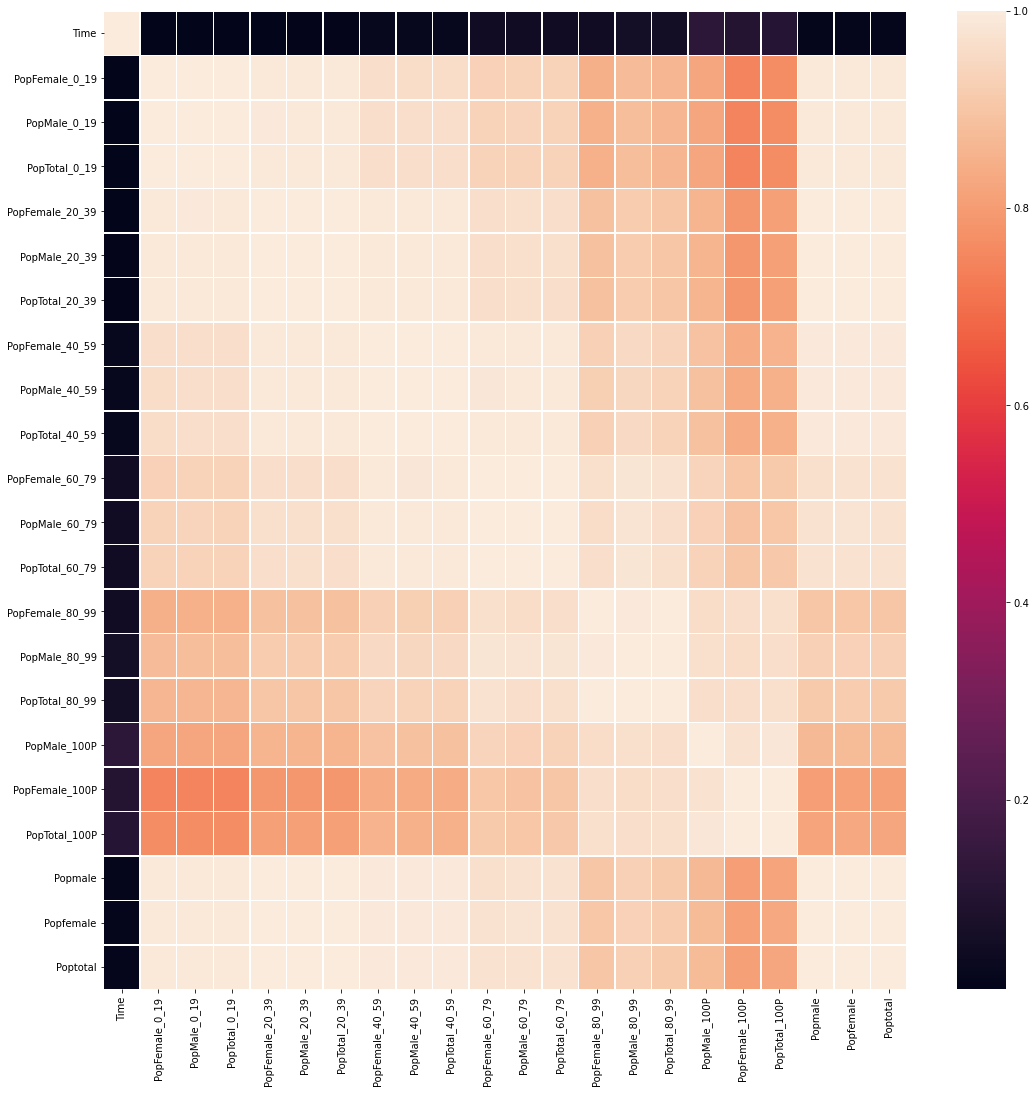

In [13]:
# we can see corelation on heatmap too.
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=False, linewidths=.5,fmt= '.2f',ax=ax )
plt.show()

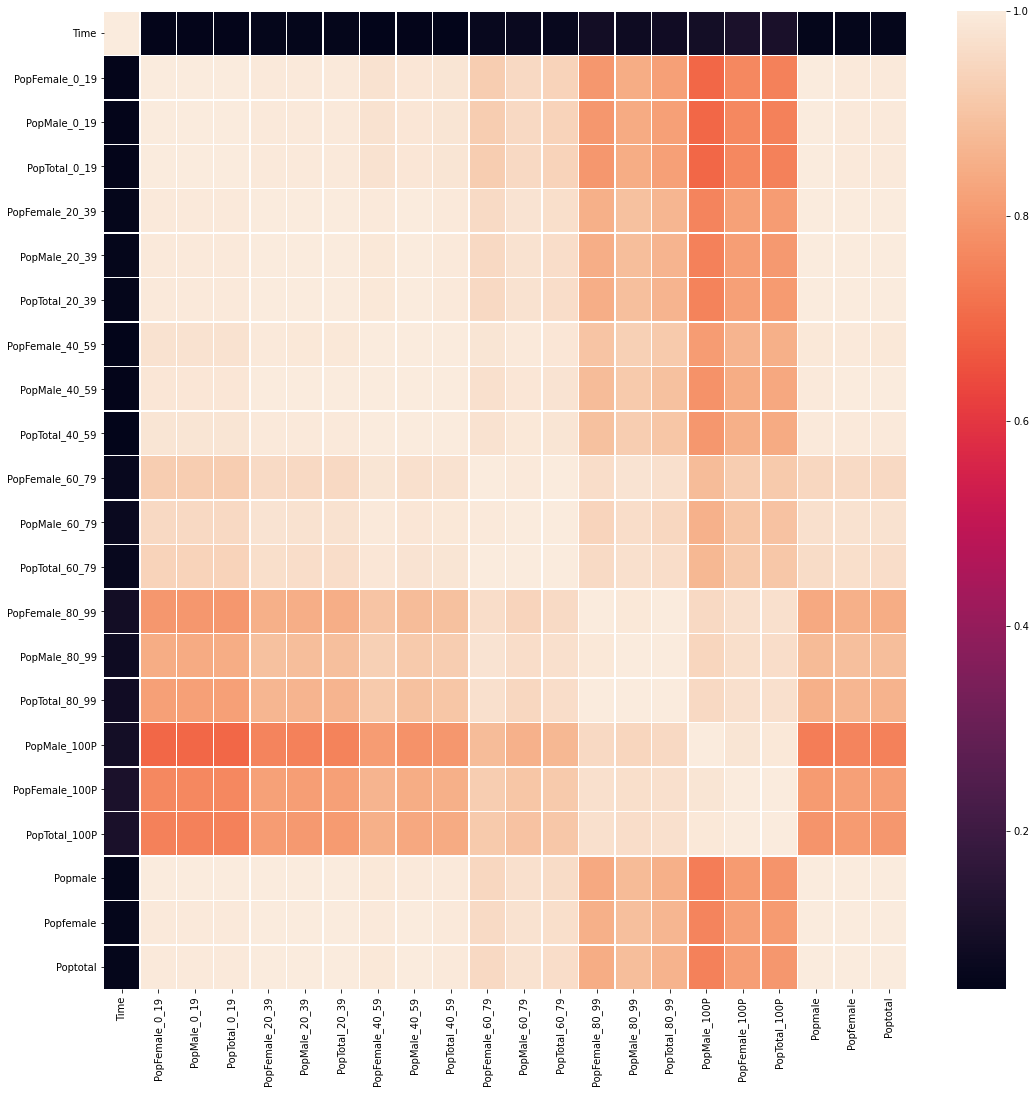

In [14]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data2.corr(), annot=False, linewidths=.5,fmt= '.2f',ax=ax )
plt.show()

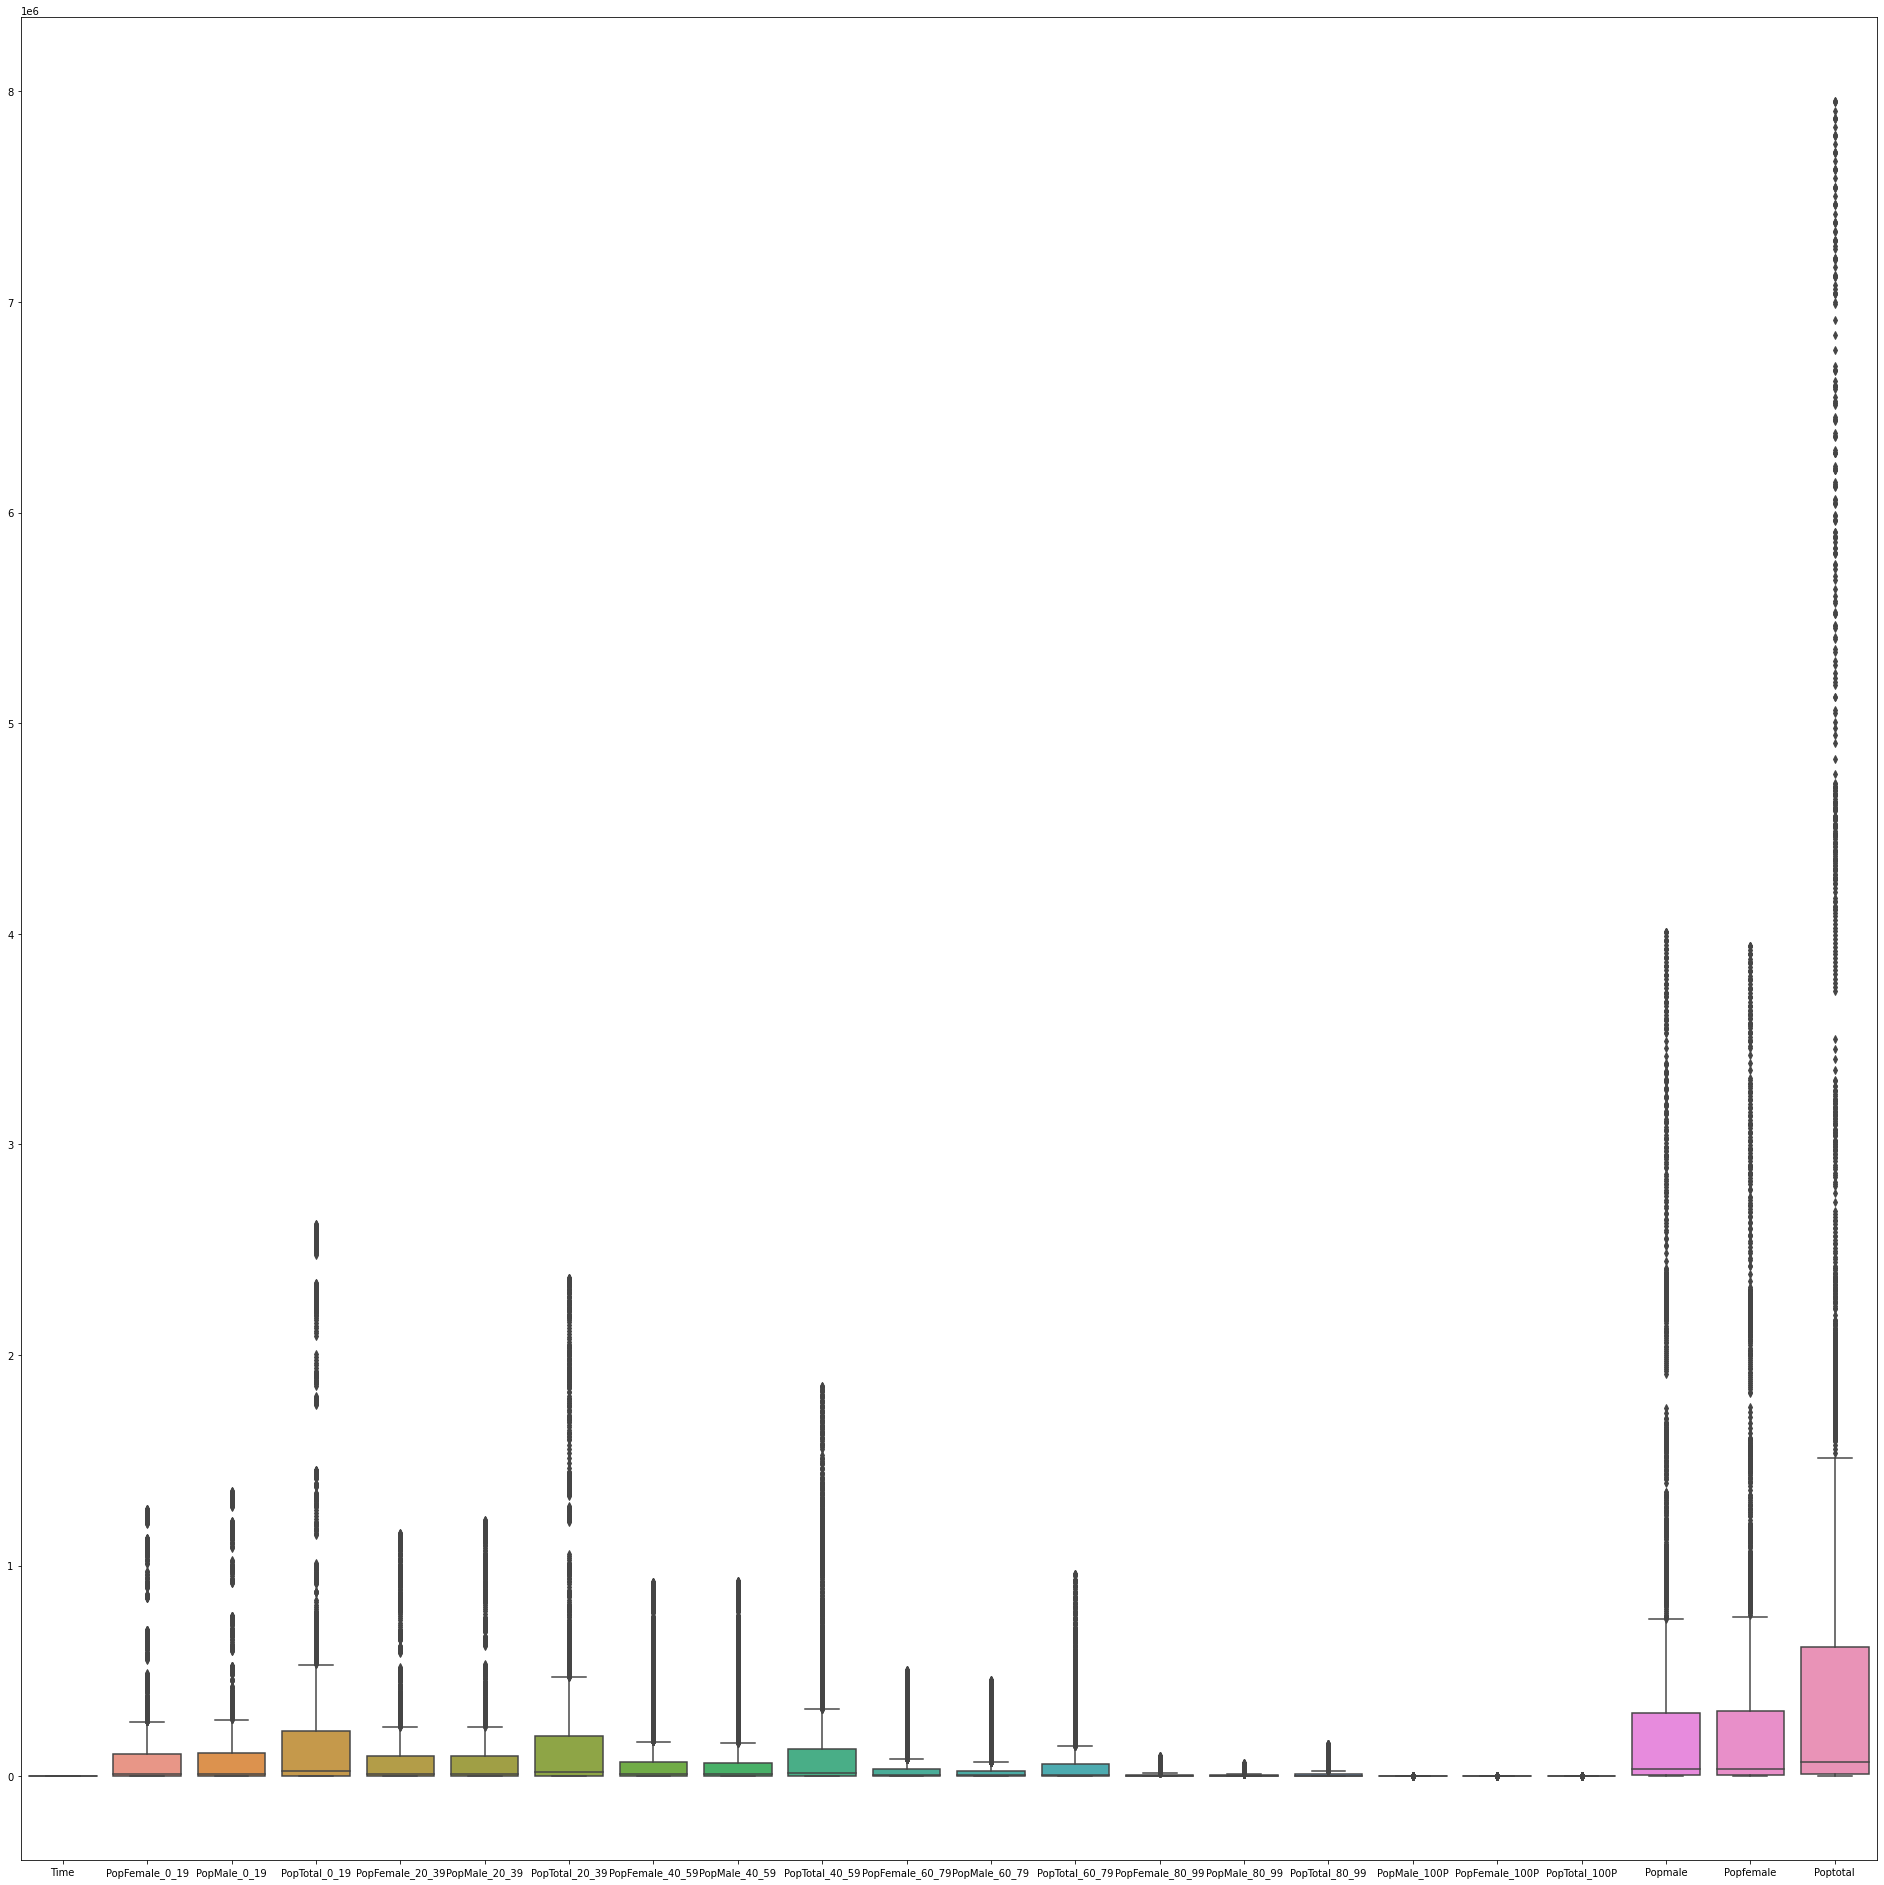

In [15]:
#We plotted a boxplot to see if there is an outlier, we didn't found any unexplainable outlier.

fig = plt.figure(figsize=(130,130))
dfplt = data.drop(columns = ["Location"],axis=1)
cols = [dfplt.columns]


for i, col in enumerate(cols):
    ax = fig.add_subplot(5,5,i+1)
    sns.boxplot(data=dfplt[col], ax=ax)

    fig.tight_layout()


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5316 entries, 61 to 66814
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         5316 non-null   object 
 1   Time             5316 non-null   int64  
 2   PopFemale_0_19   5316 non-null   float64
 3   PopMale_0_19     5316 non-null   float64
 4   PopTotal_0_19    5316 non-null   float64
 5   PopFemale_20_39  5316 non-null   float64
 6   PopMale_20_39    5316 non-null   float64
 7   PopTotal_20_39   5316 non-null   float64
 8   PopFemale_40_59  5316 non-null   float64
 9   PopMale_40_59    5316 non-null   float64
 10  PopTotal_40_59   5316 non-null   float64
 11  PopFemale_60_79  5316 non-null   float64
 12  PopMale_60_79    5316 non-null   float64
 13  PopTotal_60_79   5316 non-null   float64
 14  PopFemale_80_99  5316 non-null   float64
 15  PopMale_80_99    5316 non-null   float64
 16  PopTotal_80_99   5316 non-null   float64
 17  PopMale_100P

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 11 to 66771
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Location         8417 non-null   object 
 1   Time             8417 non-null   int64  
 2   PopFemale_0_19   8417 non-null   float64
 3   PopMale_0_19     8417 non-null   float64
 4   PopTotal_0_19    8417 non-null   float64
 5   PopFemale_20_39  8417 non-null   float64
 6   PopMale_20_39    8417 non-null   float64
 7   PopTotal_20_39   8417 non-null   float64
 8   PopFemale_40_59  8417 non-null   float64
 9   PopMale_40_59    8417 non-null   float64
 10  PopTotal_40_59   8417 non-null   float64
 11  PopFemale_60_79  8417 non-null   float64
 12  PopMale_60_79    8417 non-null   float64
 13  PopTotal_60_79   8417 non-null   float64
 14  PopFemale_80_99  8417 non-null   float64
 15  PopMale_80_99    8417 non-null   float64
 16  PopTotal_80_99   8417 non-null   float64
 17  PopMale_100P

In [18]:
# Here, we explorated data which has big info about population. 

In [19]:
# Europe Population Distribution
dfEu = df[df['Location'] == 'Europe']
dfEu.head()


,Location,Time,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,...,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale,Poptotal
24462,Europe,1950,94747.512,96550.113,191297.625,88431.014,75739.906,164170.920,71386.149,57463.632,...,59363.457,3594.263,2041.781,5636.044,2.516,8.516,11.032,256462.130,292866.729,549328.859
24463,Europe,1950,94747.512,96550.113,191297.625,88431.014,75739.906,164170.920,71386.149,57463.632,...,59363.457,3594.263,2041.781,5636.044,2.516,8.516,11.032,256462.130,292866.729,549328.859
24464,Europe,1951,95436.547,97452.033,192888.580,88165.112,76179.973,164345.085,72593.794,58430.795,...,60059.007,3807.130,2190.058,5997.188,2.329,7.728,10.057,259098.009,295226.497,554324.506
24465,Europe,1951,95436.547,97452.033,192888.580,88165.112,76179.973,164345.085,72593.794,58430.795,...,60059.007,3807.130,2190.058,5997.188,2.329,7.728,10.057,259098.009,295226.497,554324.506
24466,Europe,1952,95816.528,98074.485,193891.013,87914.197,76762.430,164676.627,74159.496,59676.953,...,60969.162,3997.926,2313.888,6311.814,2.178,7.119,9.297,261932.512,297761.850,559694.362


In [20]:
# Asia Population Distribution
dfAs = df[(df['Location'] == 'Asia')]
dfAs.head()

,Location,Time,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,...,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale,Poptotal
2718,Asia,1950,315857.388,335482.147,651339.535,202032.926,215904.497,417937.423,118164.312,124523.137,...,87836.139,3098.770,2007.024,5105.794,0.557,2.095,2.652,719348.472,685560.520,1404908.992
2719,Asia,1951,325462.728,345181.329,670644.057,205080.127,219362.512,424442.639,120092.549,126323.015,...,88778.185,3346.243,2188.790,5535.033,0.768,2.821,3.589,734977.434,700841.633,1435819.067
2720,Asia,1952,335142.692,355197.120,690339.812,207675.827,222139.988,429815.815,121784.261,127857.870,...,89211.291,3512.276,2308.125,5820.401,0.932,3.375,4.307,749651.575,715182.182,1464833.757
2721,Asia,1953,344051.819,364459.498,708511.317,210498.823,225096.428,435595.251,123648.478,129620.201,...,89592.326,3579.786,2342.771,5922.557,1.045,3.789,4.834,763844.792,729050.172,1492894.964
2722,Asia,1954,352018.895,372679.017,724697.912,213824.530,228621.723,442446.253,125831.708,131788.948,...,90193.554,3533.439,2270.930,5804.369,1.119,4.080,5.199,777943.084,742824.859,1520767.943


In [21]:
# African Group Population Distribution
dfAG = df[df['Location'] == 'African Group']
dfAG.head()

,Location,Time,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,...,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale,Poptotal
302,African Group,1950,58319.654,58899.290,117218.944,32448.276,32444.020,64892.296,17115.761,16252.371,...,11355.677,391.989,284.356,676.345,0.105,0.374,0.479,113072.404,114439.469,227511.873
303,African Group,1951,59665.004,60253.092,119918.096,33017.982,32966.179,65984.161,17388.845,16510.101,...,11514.909,413.802,301.158,714.960,0.097,0.323,0.420,115299.007,116732.485,232031.492
304,African Group,1952,61008.458,61606.767,122615.225,33661.026,33572.957,67233.983,17701.407,16808.519,...,11694.995,425.076,309.171,734.247,0.087,0.280,0.367,117651.112,119137.631,236788.743
305,African Group,1953,62361.530,62988.816,125350.346,34361.022,34241.289,68602.311,18048.297,17141.217,...,11900.766,424.110,307.258,731.368,0.079,0.246,0.325,120127.624,121647.006,241774.630
306,African Group,1954,63736.758,64417.345,128154.103,35101.857,34953.516,70055.373,18426.305,17506.312,...,12136.819,409.641,294.399,704.040,0.073,0.219,0.292,122727.179,124256.065,246983.244


In [22]:
# Australia Population Distribution
dfAu = df[df['Location'] == 'Australia']
dfAu.head()

,Location,Time,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,...,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale,Poptotal
3322,Australia,1950,1335.714,1391.684,2727.398,1250.347,1295.997,2546.344,925.775,953.475,...,923.283,58.819,42.083,100.902,0.081,0.090,0.171,4120.465,4056.883,8177.348
3323,Australia,1951,1386.998,1449.896,2836.894,1265.189,1319.942,2585.131,944.242,976.458,...,949.941,61.467,43.930,105.397,0.075,0.086,0.161,4238.415,4159.809,8398.224
3324,Australia,1952,1434.573,1501.572,2936.145,1273.682,1337.494,2611.176,963.683,1000.424,...,974.847,63.547,45.088,108.635,0.070,0.084,0.154,4342.232,4252.832,8595.064
3325,Australia,1953,1485.196,1554.828,3040.024,1276.902,1349.278,2626.180,983.243,1024.300,...,997.627,65.184,45.473,110.657,0.064,0.082,0.146,4439.526,4342.651,8782.177
3326,Australia,1954,1540.128,1611.545,3151.673,1278.437,1358.775,2637.212,1002.679,1047.739,...,1019.169,66.471,45.038,111.509,0.059,0.081,0.140,4535.952,4434.169,8970.121


In [23]:
# Northern America's Population Distribution
dfNA = df[df['Location'] == 'Northern America']
dfNA.head()

,Location,Time,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,...,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale,Poptotal
44243,Northern America,1950,28947.839,30049.808,58997.647,26651.446,26419.674,53071.120,19675.216,19573.774,...,19338.358,1101.394,838.630,1940.024,1.27,5.202,6.472,86230.104,86372.507,172602.611
44244,Northern America,1950,28947.839,30049.808,58997.647,26651.446,26419.674,53071.120,19675.216,19573.774,...,19338.358,1101.394,838.630,1940.024,1.27,5.202,6.472,86230.104,86372.507,172602.611
44245,Northern America,1951,29656.784,30737.142,60393.926,26643.022,26416.413,53059.435,19986.085,19795.826,...,19732.986,1154.187,887.622,2041.809,1.34,5.181,6.521,87337.999,87678.589,175016.588
44246,Northern America,1951,29656.784,30737.142,60393.926,26643.022,26416.413,53059.435,19986.085,19795.826,...,19732.986,1154.187,887.622,2041.809,1.34,5.181,6.521,87337.999,87678.589,175016.588
44247,Northern America,1952,30426.582,31516.254,61942.836,26649.310,26426.863,53076.173,20343.169,20084.165,...,20180.938,1211.847,932.783,2144.630,1.41,5.179,6.589,88638.898,89139.602,177778.500


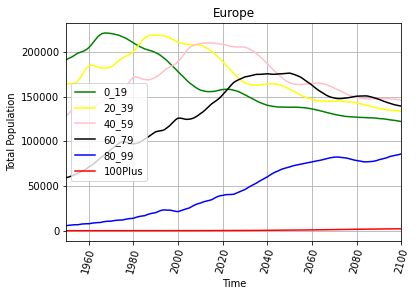

In [24]:
# Under this comment, we plot graphs to see population distribution of continents. 
plt.plot(dfEu.Time, dfEu.PopTotal_0_19, color="green", label="0_19") 
plt.plot(dfEu.Time, dfEu.PopTotal_20_39,color="yellow" , label="20_39") 
plt.plot(dfEu.Time, dfEu.PopTotal_40_59,color="pink" , label="40_59") 
plt.plot(dfEu.Time, dfEu.PopTotal_60_79,color="black" , label="60_79") 
plt.plot(dfEu.Time, dfEu.PopTotal_80_99,color="blue" , label="80_99") 

plt.plot(dfEu.Time, dfEu.PopTotal_100P,color="red", label="100Plus")  

plt.title("Europe")
plt.xlabel("Time")
plt.ylabel("Total Population")

xLeft =  df.Time.min()
xRight = df.Time.max()

plt.gca().set_xbound(xLeft, xRight)

plt.gca().xaxis.set_tick_params(rotation = 75)  

plt.grid()

plt.legend()

plt.show()


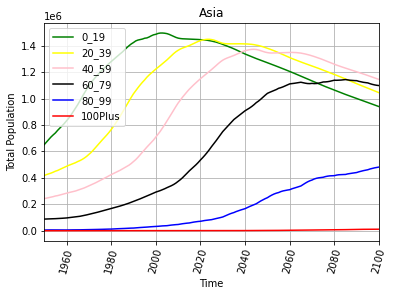

In [25]:
plt.plot(dfAs.Time, dfAs.PopTotal_0_19, color="green", label="0_19") 
plt.plot(dfAs.Time, dfAs.PopTotal_20_39,color="yellow" , label="20_39") 
plt.plot(dfAs.Time, dfAs.PopTotal_40_59,color="pink" , label="40_59") 
plt.plot(dfAs.Time, dfAs.PopTotal_60_79,color="black" , label="60_79") 
plt.plot(dfAs.Time, dfAs.PopTotal_80_99,color="blue" , label="80_99") 
plt.plot(dfAs.Time, dfAs.PopTotal_100P,color="red", label="100Plus")  

plt.title("Asia")
plt.xlabel("Time")
plt.ylabel("Total Population")

xLeft =  df.Time.min()
xRight = df.Time.max()

plt.gca().set_xbound(xLeft, xRight)

plt.gca().xaxis.set_tick_params(rotation = 75)  

plt.grid()

plt.legend()

plt.show()

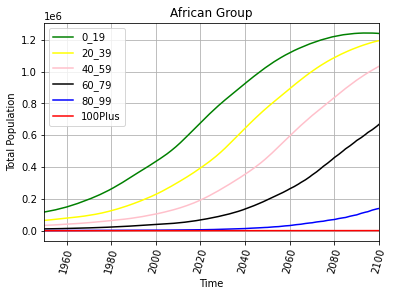

In [26]:
plt.plot(dfAG.Time, dfAG.PopTotal_0_19, color="green", label="0_19") 
plt.plot(dfAG.Time, dfAG.PopTotal_20_39,color="yellow" , label="20_39") 
plt.plot(dfAG.Time, dfAG.PopTotal_40_59,color="pink" , label="40_59") 
plt.plot(dfAG.Time, dfAG.PopTotal_60_79,color="black" , label="60_79") 
plt.plot(dfAG.Time, dfAG.PopTotal_80_99,color="blue" , label="80_99") 

plt.plot(dfAG.Time, dfAG.PopTotal_100P,color="red", label="100Plus")  

plt.title("African Group")
plt.xlabel("Time")
plt.ylabel("Total Population")

xLeft =  df.Time.min()
xRight = df.Time.max()

plt.gca().set_xbound(xLeft, xRight)

plt.gca().xaxis.set_tick_params(rotation = 75)  

plt.grid()

plt.legend()

plt.show()

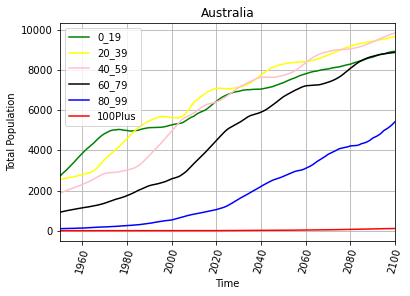

In [27]:
plt.plot(dfAu.Time, dfAu.PopTotal_0_19, color="green", label="0_19") 
plt.plot(dfAu.Time, dfAu.PopTotal_20_39,color="yellow" , label="20_39") 
plt.plot(dfAu.Time, dfAu.PopTotal_40_59,color="pink" , label="40_59") 
plt.plot(dfAu.Time, dfAu.PopTotal_60_79,color="black" , label="60_79") 
plt.plot(dfAu.Time, dfAu.PopTotal_80_99,color="blue" , label="80_99") 
plt.plot(dfAu.Time, dfAu.PopTotal_100P,color="red", label="100Plus")  

plt.title("Australia")
plt.xlabel("Time")
plt.ylabel("Total Population")

xLeft =  df.Time.min()
xRight = df.Time.max()

plt.gca().set_xbound(xLeft, xRight)

plt.gca().xaxis.set_tick_params(rotation = 75)  

plt.grid()

plt.legend()

plt.show()

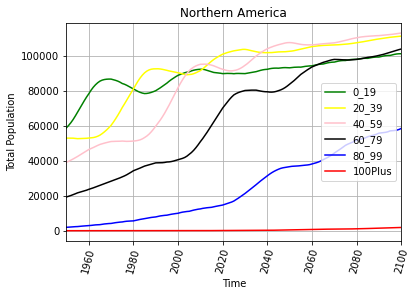

In [28]:
plt.plot(dfNA.Time, dfNA.PopTotal_0_19, color="green", label="0_19") 
plt.plot(dfNA.Time, dfNA.PopTotal_20_39,color="yellow" , label="20_39") 
plt.plot(dfNA.Time, dfNA.PopTotal_40_59,color="pink" , label="40_59") 
plt.plot(dfNA.Time, dfNA.PopTotal_60_79,color="black" , label="60_79") 
plt.plot(dfNA.Time, dfNA.PopTotal_80_99,color="blue" , label="80_99") 
plt.plot(dfNA.Time, dfNA.PopTotal_100P,color="red", label="100Plus")  

plt.title("Northern America")
plt.xlabel("Time")
plt.ylabel("Total Population")

xLeft =  df.Time.min()
xRight = df.Time.max()

plt.gca().set_xbound(xLeft, xRight)

plt.gca().xaxis.set_tick_params(rotation = 75)  

plt.grid()

plt.legend()

plt.show()

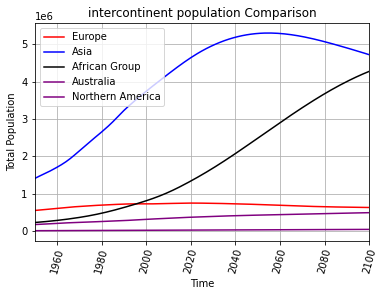

In [29]:
#Here we compare the population of 5 continent.
plt.plot(dfEu.Time, dfEu.Poptotal, color="red", label="Europe")  
plt.plot(dfAs.Time, dfAs.Poptotal, color="blue", label="Asia") 
plt.plot(dfAG.Time, dfAG.Poptotal, color="black", label="African Group") 
plt.plot(dfAu.Time, dfAu.Poptotal, color="purple", label="Australia") 
plt.plot(dfNA.Time, dfNA.Poptotal, color="purple", label="Northern America") 

# XLabel = Date, YLabel = PopTotal
plt.title("intercontinent population Comparison")
plt.xlabel("Time")
plt.ylabel("Total Population")

# Min and Max time fetching
xLeft =  df.Time.min()
xRight = df.Time.max()

# X axis bounds setted
plt.gca().set_xbound(xLeft, xRight)
#X Axis label rotate to 75 degree
plt.gca().xaxis.set_tick_params(rotation = 75)  
plt.grid()
plt.legend()

# graphic showing
plt.show()

In [30]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [31]:
#Here, we dropped "Location" to use data in next steps
data = data.drop(columns="Location",axis=1)
data2 = data2.drop(columns = "Location", axis=1)

In [32]:
#Showed the current data
data

,Time,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,PopTotal_40_59,...,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale,Poptotal
61,2011,8616.204,9030.747,17646.951,3815.751,4103.797,7919.548,1651.501,1727.454,3378.955,...,1095.483,42.420,34.031,76.451,0.007,0.016,0.023,15415.361,14702.050,30117.411
62,2012,8864.906,9291.013,18155.919,3977.544,4301.010,8278.554,1711.702,1797.248,3508.950,...,1137.273,44.825,35.833,80.658,0.007,0.017,0.024,15964.874,15196.504,31161.378
63,2013,9107.532,9553.574,18661.106,4161.018,4524.024,8685.042,1779.492,1876.702,3656.194,...,1183.479,46.678,37.066,83.744,0.008,0.019,0.027,16554.278,15715.314,32269.592
64,2014,9328.988,9791.837,19120.825,4359.443,4760.826,9120.269,1850.687,1961.251,3811.938,...,1232.313,47.859,37.571,85.430,0.008,0.021,0.029,17138.803,16232.001,33370.804
65,2015,9518.741,9987.626,19506.367,4567.271,5001.567,9568.838,1922.574,2047.575,3970.149,...,1282.697,48.297,37.224,85.521,0.009,0.022,0.031,17686.166,16727.437,34413.603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66810,2018,3836.165,3844.916,7681.081,2334.987,1966.748,4301.735,979.449,823.203,1802.652,...,591.166,45.307,16.850,62.157,0.002,0.019,0.021,6879.119,7559.693,14438.812
66811,2019,3877.144,3891.527,7768.671,2345.490,1980.207,4325.697,1020.833,859.738,1880.571,...,607.735,45.543,17.236,62.779,0.002,0.018,0.020,6983.353,7662.120,14645.473
66812,2020,3924.639,3943.476,7868.115,2355.950,1994.517,4350.467,1061.763,894.148,1955.911,...,625.773,45.338,17.304,62.642,0.002,0.017,0.019,7092.010,7770.917,14862.927
66813,2021,3947.874,3966.491,7914.365,2393.371,2039.938,4433.309,1106.499,930.314,2036.813,...,640.663,48.055,18.948,67.003,0.002,0.016,0.018,7205.231,7886.940,15092.171


In [33]:
data2

,Time,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,PopTotal_40_59,...,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale,Poptotal
11,1961,2398.367,2436.154,4834.521,1233.883,1380.641,2614.524,605.781,681.463,1287.244,...,415.476,8.358,9.283,17.641,0.000,0.000,0.000,4730.250,4439.156,9169.406
12,1962,2457.443,2492.202,4949.645,1256.882,1400.556,2657.438,615.794,688.706,1304.500,...,420.805,9.041,10.013,19.054,0.000,0.000,0.000,4816.050,4535.392,9351.442
13,1963,2515.330,2549.883,5065.213,1283.676,1422.935,2706.611,627.721,697.563,1325.284,...,426.260,9.455,10.375,19.830,0.001,0.001,0.002,4907.030,4636.170,9543.200
14,1964,2573.595,2610.528,5184.123,1313.794,1446.636,2760.430,640.750,708.143,1348.893,...,431.544,9.512,10.268,19.780,0.001,0.001,0.002,5003.245,4741.527,9744.772
15,1965,2632.925,2674.931,5307.856,1347.124,1471.075,2818.199,654.473,720.450,1374.923,...,436.637,9.132,9.569,18.701,0.001,0.001,0.002,5104.765,4851.553,9956.318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66767,1975,1878.269,1895.031,3773.300,762.112,760.252,1522.364,367.859,351.335,719.194,...,260.762,10.745,7.510,18.255,0.000,0.000,0.000,3134.875,3159.000,6293.875
66768,1976,1946.530,1964.177,3910.707,788.955,783.712,1572.667,374.344,356.888,731.232,...,268.186,11.604,8.170,19.774,0.000,0.000,0.000,3237.296,3265.270,6502.566
66769,1977,2016.338,2034.349,4050.687,815.977,806.978,1622.955,380.073,361.673,741.746,...,276.599,12.217,8.621,20.838,0.000,0.000,0.000,3339.963,3372.862,6712.825
66770,1978,2088.100,2106.477,4194.577,844.143,831.310,1675.453,385.878,366.517,752.395,...,285.845,12.552,8.841,21.393,0.000,0.000,0.000,3445.791,3483.872,6929.663


In [34]:
#Here, we dropped to "Time" column too, because we already take a sample from targetted place and time column no longer needed.
#We split the data as X and Y data which represents dependent and independent variables.
data=data.drop(columns="Time",axis=1)
data2 = data2.drop(columns= "Time",axis=1)

yData = data[["Poptotal"]]
XData = data.drop(columns="Poptotal")

yData2 = data2[["Poptotal"]]
XData2 = data2.drop(columns="Poptotal")

columnss = XData.columns
columnss2 = XData2.columns

columnss
columnss2

Index(['PopFemale_0_19', 'PopMale_0_19', 'PopTotal_0_19', 'PopFemale_20_39',
       'PopMale_20_39', 'PopTotal_20_39', 'PopFemale_40_59', 'PopMale_40_59',
       'PopTotal_40_59', 'PopFemale_60_79', 'PopMale_60_79', 'PopTotal_60_79',
       'PopFemale_80_99', 'PopMale_80_99', 'PopTotal_80_99', 'PopMale_100P',
       'PopFemale_100P', 'PopTotal_100P', 'Popmale', 'Popfemale'],
      dtype='object')

In [35]:
#Here, we showed current shapes of samples.

In [36]:
XData.shape

(5316, 20)

In [37]:
yData.shape

(5316, 1)

In [38]:
XData2.shape

(8417, 20)

In [39]:
yData2.shape

(8417, 1)

In [40]:
#Here we transformed datasets into DataFrames.
XData = pd.DataFrame(XData,columns = columnss)
XData

,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,PopTotal_40_59,PopFemale_60_79,PopMale_60_79,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale
61,8616.204,9030.747,17646.951,3815.751,4103.797,7919.548,1651.501,1727.454,3378.955,576.158,519.325,1095.483,42.420,34.031,76.451,0.007,0.016,0.023,15415.361,14702.050
62,8864.906,9291.013,18155.919,3977.544,4301.010,8278.554,1711.702,1797.248,3508.950,597.510,539.763,1137.273,44.825,35.833,80.658,0.007,0.017,0.024,15964.874,15196.504
63,9107.532,9553.574,18661.106,4161.018,4524.024,8685.042,1779.492,1876.702,3656.194,620.575,562.904,1183.479,46.678,37.066,83.744,0.008,0.019,0.027,16554.278,15715.314
64,9328.988,9791.837,19120.825,4359.443,4760.826,9120.269,1850.687,1961.251,3811.938,645.003,587.310,1232.313,47.859,37.571,85.430,0.008,0.021,0.029,17138.803,16232.001
65,9518.741,9987.626,19506.367,4567.271,5001.567,9568.838,1922.574,2047.575,3970.149,670.532,612.165,1282.697,48.297,37.224,85.521,0.009,0.022,0.031,17686.166,16727.437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66810,3836.165,3844.916,7681.081,2334.987,1966.748,4301.735,979.449,823.203,1802.652,363.766,227.400,591.166,45.307,16.850,62.157,0.002,0.019,0.021,6879.119,7559.693
66811,3877.144,3891.527,7768.671,2345.490,1980.207,4325.697,1020.833,859.738,1880.571,373.092,234.643,607.735,45.543,17.236,62.779,0.002,0.018,0.020,6983.353,7662.120
66812,3924.639,3943.476,7868.115,2355.950,1994.517,4350.467,1061.763,894.148,1955.911,383.210,242.563,625.773,45.338,17.304,62.642,0.002,0.017,0.019,7092.010,7770.917
66813,3947.874,3966.491,7914.365,2393.371,2039.938,4433.309,1106.499,930.314,2036.813,391.125,249.538,640.663,48.055,18.948,67.003,0.002,0.016,0.018,7205.231,7886.940


In [41]:
XData2 = pd.DataFrame(XData2,columns = columnss2)
XData2

,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,PopTotal_40_59,PopFemale_60_79,PopMale_60_79,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale
11,2398.367,2436.154,4834.521,1233.883,1380.641,2614.524,605.781,681.463,1287.244,192.767,222.709,415.476,8.358,9.283,17.641,0.000,0.000,0.000,4730.250,4439.156
12,2457.443,2492.202,4949.645,1256.882,1400.556,2657.438,615.794,688.706,1304.500,196.232,224.573,420.805,9.041,10.013,19.054,0.000,0.000,0.000,4816.050,4535.392
13,2515.330,2549.883,5065.213,1283.676,1422.935,2706.611,627.721,697.563,1325.284,199.987,226.273,426.260,9.455,10.375,19.830,0.001,0.001,0.002,4907.030,4636.170
14,2573.595,2610.528,5184.123,1313.794,1446.636,2760.430,640.750,708.143,1348.893,203.875,227.669,431.544,9.512,10.268,19.780,0.001,0.001,0.002,5003.245,4741.527
15,2632.925,2674.931,5307.856,1347.124,1471.075,2818.199,654.473,720.450,1374.923,207.898,228.739,436.637,9.132,9.569,18.701,0.001,0.001,0.002,5104.765,4851.553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66767,1878.269,1895.031,3773.300,762.112,760.252,1522.364,367.859,351.335,719.194,140.015,120.747,260.762,10.745,7.510,18.255,0.000,0.000,0.000,3134.875,3159.000
66768,1946.530,1964.177,3910.707,788.955,783.712,1572.667,374.344,356.888,731.232,143.837,124.349,268.186,11.604,8.170,19.774,0.000,0.000,0.000,3237.296,3265.270
66769,2016.338,2034.349,4050.687,815.977,806.978,1622.955,380.073,361.673,741.746,148.257,128.342,276.599,12.217,8.621,20.838,0.000,0.000,0.000,3339.963,3372.862
66770,2088.100,2106.477,4194.577,844.143,831.310,1675.453,385.878,366.517,752.395,153.199,132.646,285.845,12.552,8.841,21.393,0.000,0.000,0.000,3445.791,3483.872


In [42]:
yData.head()

,Poptotal
61,30117.411
62,31161.378
63,32269.592
64,33370.804
65,34413.603


In [43]:
yData2.head()

,Poptotal
11,9169.406
12,9351.442
13,9543.200
14,9744.772
15,9956.318


In [44]:
#Here, we splitted the dataframe and take Popmale and Popfemale columns
TotalGenderColumns = pd.concat([XData["Popmale"],XData["Popfemale"]], axis = 1)
TotalGenderColumns.head()

,Popmale,Popfemale
61,15415.361,14702.050
62,15964.874,15196.504
63,16554.278,15715.314
64,17138.803,16232.001
65,17686.166,16727.437


In [45]:
TotalGenderColumns2 = pd.concat([XData2["Popmale"],XData2["Popfemale"]], axis = 1)
TotalGenderColumns2.head()

,Popmale,Popfemale
11,4730.250,4439.156
12,4816.050,4535.392
13,4907.030,4636.170
14,5003.245,4741.527
15,5104.765,4851.553


In [46]:
from sklearn.cluster import KMeans
#We took n_cluster 2 cause there is 2 cluster (female-male)
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans.fit(TotalGenderColumns)

KMeans(n_clusters=2, random_state=1)

In [47]:
kmeans2 = KMeans(n_clusters=2,random_state=1)
kmeans.fit(TotalGenderColumns2)

KMeans(n_clusters=2, random_state=1)

In [48]:
#We scaled and fit datasets.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Sample_Scaled_df = scaler.fit_transform(TotalGenderColumns)

In [49]:
scaler2 = StandardScaler()
Sample_Scaled_df2 = scaler2.fit_transform(TotalGenderColumns2)

In [50]:
km_sample = KMeans(n_clusters=2)
km_sample.fit(Sample_Scaled_df)

KMeans(n_clusters=2)

In [51]:
km_sample2 = KMeans(n_clusters=2)
km_sample2.fit(Sample_Scaled_df2)

KMeans(n_clusters=2)

In [52]:
km_sample.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
km_sample2.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
#Here, we added label column and showed the label counts.
labels_sample = km_sample.labels_
TotalGenderColumns['label'] = labels_sample
TotalGenderColumns['label'].value_counts()

0    4944
1     372
Name: label, dtype: int64

In [55]:
labels_sample2 = km_sample2.labels_
TotalGenderColumns2['label'] = labels_sample2
TotalGenderColumns2['label'].value_counts()

0    7787
1     630
Name: label, dtype: int64

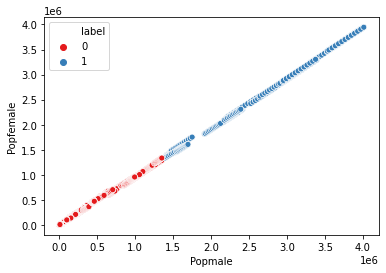

In [56]:
#Here, we tried to cluster our data according to Popmale and Popfemale columns. The  plot showed us to use linear regression.
sns.set_palette('Set2')
sns.scatterplot(TotalGenderColumns['Popmale'],TotalGenderColumns['Popfemale'],hue=TotalGenderColumns['label'],palette='Set1')
plt.show()

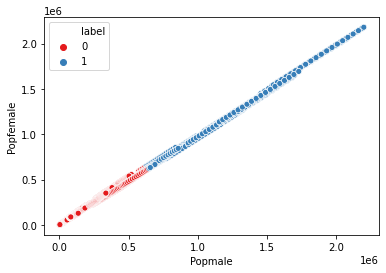

In [57]:
sns.set_palette('Set2')
sns.scatterplot(TotalGenderColumns2['Popmale'],TotalGenderColumns2['Popfemale'],hue=TotalGenderColumns2['label'],palette='Set1')
plt.show()

In [58]:
yData.head()

,Poptotal
61,30117.411
62,31161.378
63,32269.592
64,33370.804
65,34413.603


In [59]:
yData2.head()

,Poptotal
11,9169.406
12,9351.442
13,9543.200
14,9744.772
15,9956.318


In [60]:
XData.head()

,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,PopTotal_40_59,PopFemale_60_79,PopMale_60_79,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale
61,8616.204,9030.747,17646.951,3815.751,4103.797,7919.548,1651.501,1727.454,3378.955,576.158,519.325,1095.483,42.420,34.031,76.451,0.007,0.016,0.023,15415.361,14702.050
62,8864.906,9291.013,18155.919,3977.544,4301.010,8278.554,1711.702,1797.248,3508.950,597.510,539.763,1137.273,44.825,35.833,80.658,0.007,0.017,0.024,15964.874,15196.504
63,9107.532,9553.574,18661.106,4161.018,4524.024,8685.042,1779.492,1876.702,3656.194,620.575,562.904,1183.479,46.678,37.066,83.744,0.008,0.019,0.027,16554.278,15715.314
64,9328.988,9791.837,19120.825,4359.443,4760.826,9120.269,1850.687,1961.251,3811.938,645.003,587.310,1232.313,47.859,37.571,85.430,0.008,0.021,0.029,17138.803,16232.001
65,9518.741,9987.626,19506.367,4567.271,5001.567,9568.838,1922.574,2047.575,3970.149,670.532,612.165,1282.697,48.297,37.224,85.521,0.009,0.022,0.031,17686.166,16727.437


In [61]:
XData2.head()

,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,PopTotal_40_59,PopFemale_60_79,PopMale_60_79,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale
11,2398.367,2436.154,4834.521,1233.883,1380.641,2614.524,605.781,681.463,1287.244,192.767,222.709,415.476,8.358,9.283,17.641,0.000,0.000,0.000,4730.250,4439.156
12,2457.443,2492.202,4949.645,1256.882,1400.556,2657.438,615.794,688.706,1304.500,196.232,224.573,420.805,9.041,10.013,19.054,0.000,0.000,0.000,4816.050,4535.392
13,2515.330,2549.883,5065.213,1283.676,1422.935,2706.611,627.721,697.563,1325.284,199.987,226.273,426.260,9.455,10.375,19.830,0.001,0.001,0.002,4907.030,4636.170
14,2573.595,2610.528,5184.123,1313.794,1446.636,2760.430,640.750,708.143,1348.893,203.875,227.669,431.544,9.512,10.268,19.780,0.001,0.001,0.002,5003.245,4741.527
15,2632.925,2674.931,5307.856,1347.124,1471.075,2818.199,654.473,720.450,1374.923,207.898,228.739,436.637,9.132,9.569,18.701,0.001,0.001,0.002,5104.765,4851.553


In [62]:
# We split our data into train, validation and test sets randomly
X_train, X_test, Y_train, Y_test = train_test_split(XData,yData, train_size=0.80,  random_state=1)
x_train, x_val, y_train, y_val = train_test_split(X_train,Y_train, train_size=0.70, random_state=1)
x_train.shape, y_train.shape, x_val.shape, y_val.shape, X_test.shape, Y_test.shape

((2976, 20), (2976, 1), (1276, 20), (1276, 1), (1064, 20), (1064, 1))

In [63]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(XData2,yData2, train_size=0.80, random_state=1)
x_train2, x_val2, y_train2, y_val2 = train_test_split(X_train2,Y_train2, train_size=0.70,random_state=1)
x_train2.shape, y_train2.shape, x_val2.shape, y_val2.shape, X_test2.shape, Y_test2.shape

((4713, 20), (4713, 1), (2020, 20), (2020, 1), (1684, 20), (1684, 1))

In [64]:
x_train.head()

,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,PopTotal_40_59,PopFemale_60_79,PopMale_60_79,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale
51714,63867.796,66363.125,130230.921,68278.691,68655.148,136933.839,54917.984,52060.580,106978.564,29400.651,24789.432,54190.083,5768.479,3539.354,9307.833,13.067,40.129,53.196,215420.706,222273.730
21506,35446.374,37361.891,72808.265,25811.407,26520.276,52331.683,13501.087,13433.269,26934.356,5262.646,4682.324,9944.970,690.208,445.192,1135.400,0.200,0.956,1.156,82443.152,80712.678
23471,1196.156,1236.471,2432.627,1071.765,920.806,1992.571,693.229,526.259,1219.488,346.037,256.977,603.014,63.139,45.141,108.280,0.036,0.121,0.157,2985.690,3370.447
16531,352636.770,384166.602,736803.372,325597.660,351801.332,677398.992,219264.863,226969.824,446234.687,94911.672,92590.927,187502.599,11755.001,9714.840,21469.841,24.356,42.168,66.524,1065267.881,1004208.134
53213,3360.038,3407.264,6767.302,3190.436,3026.997,6217.433,2538.486,2356.149,4894.635,1224.999,996.472,2221.471,174.841,122.417,297.258,0.284,0.113,0.397,9909.583,10488.913


In [65]:
x_train2.head()

,PopFemale_0_19,PopMale_0_19,PopTotal_0_19,PopFemale_20_39,PopMale_20_39,PopTotal_20_39,PopFemale_40_59,PopMale_40_59,PopTotal_40_59,PopFemale_60_79,PopMale_60_79,PopTotal_60_79,PopFemale_80_99,PopMale_80_99,PopTotal_80_99,PopMale_100P,PopFemale_100P,PopTotal_100P,Popmale,Popfemale
1992,2275.200,2321.858,4597.058,965.598,1067.622,2033.220,556.608,524.964,1081.572,162.279,163.173,325.452,10.127,10.671,20.798,0.002,0.010,0.012,4088.290,3969.822
24490,106164.513,110804.225,216968.738,92431.195,90687.210,183118.405,78766.405,62688.791,141455.196,47234.764,31501.287,78736.051,5936.727,3145.462,9082.189,1.482,5.105,6.587,298828.457,330538.709
47728,6855.719,7372.234,14227.953,3705.014,3580.391,7285.405,1922.447,1937.255,3859.702,767.672,594.757,1362.429,51.454,25.121,76.575,0.005,0.015,0.020,13509.763,13302.321
18751,11230.356,11656.189,22886.545,6231.981,6210.362,12442.343,3489.731,2961.053,6450.784,1202.384,886.462,2088.846,88.587,39.276,127.863,0.003,0.013,0.016,21753.345,22243.052
58763,62360.485,64255.632,126616.117,48089.663,48063.405,96153.068,39144.397,31190.652,70335.049,23995.965,13103.831,37099.796,2760.750,1097.677,3858.427,1.118,4.143,5.261,157712.315,176355.403


In [66]:
y_train.head()

,Poptotal
51714,437694.436
21506,163155.830
23471,6356.137
16531,2069476.015
53213,20398.496


In [67]:
y_train2.head()

,Poptotal
1992,8058.112
24490,629367.166
47728,26812.084
18751,43996.397
58763,334067.718


In [68]:
X_train.shape # train + validation | because we need to split min 3000 train set and 1000 test set.

(4252, 20)

In [69]:
X_train2.shape # train + validation

(6733, 20)

In [70]:
from sklearn.linear_model import LinearRegression
#The next step is to create a linear regression model and fit it using the existing data. With .fit(), we calculated the optimal 
#values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments. In other words,.fit() fits 
#the model.

reg = LinearRegression().fit(x_train, y_train)

In [71]:

reg2 = LinearRegression().fit(x_train2, y_train2)

In [72]:
#Here is the predicted values
val_pred = reg.predict(x_val)

val_pred

array([[ 6347.564],
       [58664.095],
       [ 6702.379],
       ...,
       [ 5850.902],
       [ 4679.673],
       [21497.306]])

In [73]:
val_pred2 = reg2.predict(x_val2)

val_pred2

array([[1.36361800e+03],
       [3.22297040e+05],
       [2.66005000e+02],
       ...,
       [5.91995800e+03],
       [2.72766282e+05],
       [3.30263600e+03]])

In [74]:
y_val

,Poptotal
33583,6347.564
29213,58664.095
42804,6702.379
61222,1242534.551
6411,763.094
...,...
7918,10488.002
13503,39278.630
55636,5850.902
42648,4679.673


In [75]:
y_val2

,Poptotal
53329,1363.618
13163,322297.040
23569,266.005
11644,24689.669
17090,816971.714
...,...
52119,311796.195
15427,242140.516
55293,5919.958
61324,272766.282


In [76]:
from sklearn.metrics import mean_absolute_error
#We use mean absolute error to show our error rate.  
print("Mean absolute error: ", mean_absolute_error(y_val, val_pred))


Mean absolute error:  1.0029450707764605e-09


In [77]:
print("Mean absolute error: ", mean_absolute_error(y_val2, val_pred2))


Mean absolute error:  1.344755945761916e-10


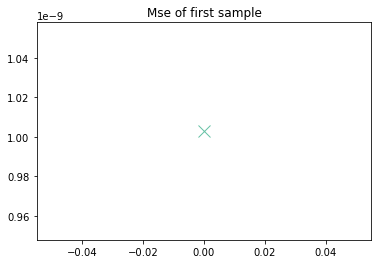

In [78]:
#As you can see above, If we use a bigger sample to train our data, error decreases.

#And under the graphs say the mse scores close to each ot
plt.plot(mean_absolute_error(y_val, val_pred),marker="x", markerfacecolor='blue', markersize=12)

 
# giving a title to my graph
plt.title('Mse of first sample')
 
# function to show the plot
plt.show()

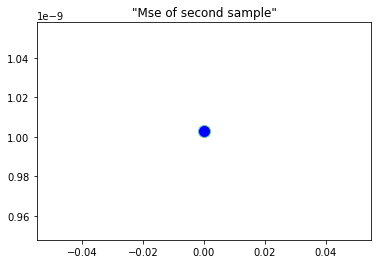

In [79]:
plt.plot(mean_absolute_error(y_val, val_pred),marker="o", markerfacecolor='blue', markersize=12)

 
# giving a title to my graph
plt.title('"Mse of second sample"')
 
# function to show the plot
plt.show()

In [80]:
#Here in for loop we crate a lot of samples and show them in a graph 'mse distributions.'
mse_list = []

In [81]:
for i in range(12,151):
    sample_data=df[df["Time"]<1950+i]
    sample_data=sample_data[sample_data["Time"]>1949]
    sample_data = sample_data.drop(columns="Location",axis=1)
    sample_data=sample_data.drop(columns="Time",axis=1)
    

    yData = sample_data[["Poptotal"]]
    XData = sample_data.drop(columns="Poptotal")

    columnss = XData.columns
    
    XData = pd.DataFrame(XData,columns = columnss)
    
    X_train, X_test, Y_train, Y_test = train_test_split(XData,yData, train_size=0.80,  random_state=1)
    x_train, x_val, y_train, y_val = train_test_split(X_train,Y_train, train_size=0.70, random_state=1)
    
    reg = LinearRegression().fit(x_train, y_train)
    
    val_pred = reg.predict(x_val)
    
    print(mean_absolute_error(y_val, val_pred))
    
    mse_list.append(mean_absolute_error(y_val, val_pred))

1.9518304353464387e-10
3.5483111267248897e-10
2.8830263868352717e-10
1.3415437315544356e-10
9.890397940512043e-11
3.23982044731875e-10
2.686095646385247e-10
4.732863975319371e-10
8.641853925247841e-11
1.1553222507650924e-10
3.987519020500996e-10
3.3054114292578915e-10
6.795686451740854e-10
3.998101353372312e-10
6.590082802144696e-10
1.6109129031296982e-10
6.049590448263923e-11
6.948499052403947e-10
2.4929641242322637e-10
3.522732704247468e-10
7.787609614214936e-11
2.644368202449659e-10
1.4167875331510824e-10
5.95075019650267e-10
8.098702983056397e-10
3.9313182839603967e-10
7.498527327949357e-10
9.894925829321538e-11
1.7059775062423448e-10
6.310940578974222e-10
7.605456558111334e-10
7.799964986138079e-10
1.4475943241126878e-10
8.236293245008121e-10
1.3707607636262626e-09
8.771791417213572e-10
1.628064141529723e-09
7.184511480089059e-10
3.557971441088918e-10
3.449532617670542e-10
1.4545694477477505e-10
1.9921548027499887e-10
3.9680967517596675e-10
3.7612464290716895e-10
1.113896701223405

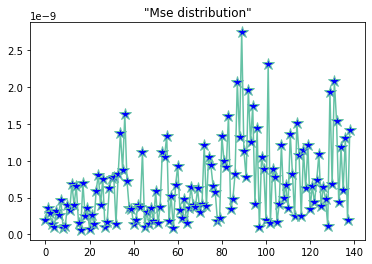

In [82]:
# As you can see here there are 139 samples of our data from 1950-1952 to 1950-2100
# At every sample if we increase the size of sample then the mse changes according to sample size.
# We see that the first mse lower than last mse. 
plt.plot(mse_list,marker="*", markerfacecolor='blue', markersize=12)
plt.title('"Mse distribution"')
plt.show()

In [83]:
from sklearn.preprocessing import PolynomialFeatures
#Then, we use Polynomial Regression to see if we increase the degree of regression what change on predictions.
poly = PolynomialFeatures(1)
poly.fit_transform(x_train)

array([[1.00000000e+00, 6.00882130e+04, 6.09122780e+04, ...,
        3.80000000e-01, 1.36670019e+05, 1.41415654e+05],
       [1.00000000e+00, 5.95940000e+01, 6.28670000e+01, ...,
        9.30000000e-02, 3.20962000e+02, 3.46530000e+02],
       [1.00000000e+00, 4.34160000e+01, 4.45640000e+01, ...,
        1.10000000e-02, 1.25539000e+02, 1.35394000e+02],
       ...,
       [1.00000000e+00, 1.80214920e+04, 1.86025090e+04, ...,
        1.17300000e+00, 3.44802960e+04, 3.55934330e+04],
       [1.00000000e+00, 7.10653174e+05, 7.51035757e+05, ...,
        1.25311540e+04, 3.33828733e+06, 3.28153453e+06],
       [1.00000000e+00, 6.18140130e+04, 6.47973760e+04, ...,
        2.96193000e+02, 2.47880579e+05, 2.44830308e+05]])

In [84]:
poly = PolynomialFeatures(2)
poly.fit_transform(x_train)

array([[1.00000000e+00, 6.00882130e+04, 6.09122780e+04, ...,
        1.86786941e+10, 1.93272801e+10, 1.99983872e+10],
       [1.00000000e+00, 5.95940000e+01, 6.28670000e+01, ...,
        1.03016605e+05, 1.11222962e+05, 1.20083041e+05],
       [1.00000000e+00, 4.34160000e+01, 4.45640000e+01, ...,
        1.57600405e+04, 1.69972274e+04, 1.83315352e+04],
       ...,
       [1.00000000e+00, 1.80214920e+04, 1.86025090e+04, ...,
        1.18889081e+09, 1.22727211e+09, 1.26689247e+09],
       [1.00000000e+00, 7.10653174e+05, 7.51035757e+05, ...,
        1.11441623e+13, 1.09547051e+13, 1.07684689e+13],
       [1.00000000e+00, 6.18140130e+04, 6.47973760e+04, ...,
        6.14447814e+10, 6.06886785e+10, 5.99418797e+10]])

In [85]:
poly2 = PolynomialFeatures(1)
poly2.fit_transform(x_train2)

array([[1.00000000e+00, 2.27520000e+03, 2.32185800e+03, ...,
        1.20000000e-02, 4.08829000e+03, 3.96982200e+03],
       [1.00000000e+00, 1.06164513e+05, 1.10804225e+05, ...,
        6.58700000e+00, 2.98828457e+05, 3.30538709e+05],
       [1.00000000e+00, 6.85571900e+03, 7.37223400e+03, ...,
        2.00000000e-02, 1.35097630e+04, 1.33023210e+04],
       ...,
       [1.00000000e+00, 1.54981100e+03, 1.60824000e+03, ...,
        1.30000000e-02, 2.90934200e+03, 2.87714000e+03],
       [1.00000000e+00, 1.66860000e+01, 1.72100000e+01, ...,
        5.00000000e-03, 6.18570000e+01, 6.58340000e+01],
       [1.00000000e+00, 1.42318300e+03, 1.50558500e+03, ...,
        5.70000000e-02, 5.10040900e+03, 5.42636800e+03]])

In [86]:
poly2 = PolynomialFeatures(2)
poly2.fit_transform(x_train2)

array([[1.00000000e+00, 2.27520000e+03, 2.32185800e+03, ...,
        1.67141151e+07, 1.62297836e+07, 1.57594867e+07],
       [1.00000000e+00, 1.06164513e+05, 1.10804225e+05, ...,
        8.92984467e+10, 9.87743724e+10, 1.09255838e+11],
       [1.00000000e+00, 6.85571900e+03, 7.37223400e+03, ...,
        1.82513696e+08, 1.79711204e+08, 1.76951744e+08],
       ...,
       [1.00000000e+00, 1.54981100e+03, 1.60824000e+03, ...,
        8.46427087e+06, 8.37058424e+06, 8.27793458e+06],
       [1.00000000e+00, 1.66860000e+01, 1.72100000e+01, ...,
        3.82628845e+03, 4.07229374e+03, 4.33411556e+03],
       [1.00000000e+00, 1.42318300e+03, 1.50558500e+03, ...,
        2.60141720e+07, 2.76766962e+07, 2.94454697e+07]])

In [87]:
#When we’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².
#The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁:
model = LinearRegression().fit(x_train, y_train)
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 1.0
intercept: [-1.16415322e-09]
slope: [[ 1.42857143e-01  1.42857143e-01 -1.76857195e-10  1.42857143e-01
   1.42857143e-01 -4.96929585e-10  1.42857143e-01  1.42857143e-01
  -2.31524741e-11  1.42857143e-01  1.42857143e-01 -2.41212801e-10
   1.42857142e-01  1.42857142e-01  1.41506875e-10  1.42857144e-01
   1.42857144e-01 -1.27807564e-09  8.57142857e-01  8.57142857e-01]]


In [88]:
#The value 𝑏₀ = 3.49245965e-10 (intercept, approximately) showes that our model predicts  3.49245965e-10 when 𝑥 is zero.
#The value 𝑏₁ = slope means that the predicted value rises by slope's values when 𝑥 is increased by one.

In [89]:
model2 = LinearRegression().fit(x_train2, y_train2)
r_sq2 = model.score(x_train2, y_train2)
print('coefficient of determination:', r_sq2)
print('intercept:', model2.intercept_)
print('slope:', model2.coef_)

coefficient of determination: 1.0
intercept: [1.16415322e-10]
slope: [[ 1.42857143e-01  1.42857142e-01 -9.99777901e-10  1.42857141e-01
   1.42857139e-01  1.56858262e-09  1.42857142e-01  1.42857141e-01
   1.67489046e-10  1.42857141e-01  1.42857139e-01  1.53661877e-09
   1.42857142e-01  1.42857140e-01  3.94979763e-10  1.42857153e-01
   1.42857155e-01 -1.24608603e-08  8.57142859e-01  8.57142858e-01]]


In [90]:
#Same thing as 𝑏₀ = 1.16415322e-10 and 𝑏₁ = slope

In [91]:
#Because of there is a satisfactory model, we can  use it for predictions.
y_pred = model.predict(x_train)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[2.78085673e+05]
 [6.67492000e+02]
 [2.60933000e+02]
 ...
 [7.00737290e+04]
 [6.61982186e+06]
 [4.92710887e+05]]


In [92]:
y_pred2 = model.predict(x_train2)
print('predicted response:', y_pred2, sep='\n')

predicted response:
[[8.05811200e+03]
 [6.29367166e+05]
 [2.68120840e+04]
 ...
 [5.78648200e+03]
 [1.27691000e+02]
 [1.05267770e+04]]


In [93]:
lr = LinearRegression()
lr2 = LinearRegression()

In [94]:
lr.fit(x_train, y_train)
lr2.fit(x_train2, y_train2)

LinearRegression()

In [95]:
y_pred = lr.predict(X_test)

In [96]:
y_pred2 = lr2.predict(X_test2)

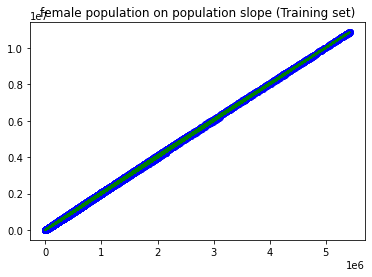

In [97]:
# Here, we showed that the distribution of female-male population on population.
plt.scatter(x_train['Popfemale'], y_train, color = "blue")
plt.plot(x_train["Popfemale"], lr.predict(x_train), color = "green")
plt.title("female population on population slope (Training set)")
plt.show()

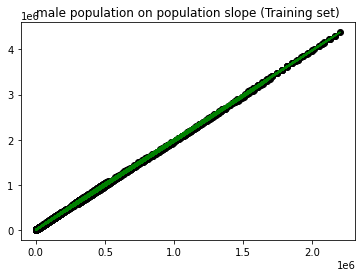

In [98]:
plt.scatter(x_train2['Popmale'], y_train2, color = "black")
plt.plot(x_train2['Popmale'], lr2.predict(x_train2), color = "green")
plt.title("male population on population slope (Training set)")
plt.show()